In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



sub_verb_obj = pd.read_csv("/Users/janine/Documents/NLP/Project/code/text_data/sub_berv_obj.csv")
action_df = pd.DataFrame(sub_verb_obj)
action_df.head(10)

,Unnamed: 0,log_prob,name,obj,span,verb,verse
0,0,-8.941291,McGonagall,Dumbledore,Professor McGonagall shot a sharp look at Dumb...,shot,228
1,1,-10.951256,McGonagall,Dumbledore,that Professor McGonagall had reached the poin...,reached,232
2,2,-7.258025,Dumbledore,Hagrid,"I would trust Hagrid with my life,"" said Dumbl...",said,294
3,3,-8.452874,Dumbledore,Harry,Dumbledore took Harry in his arms and turned t...,took,324
4,4,-7.258025,Hagrid,Sirius,"""Yeah,"" said Hagrid in a very muffled voice, ""...",said,339
5,5,-7.258025,Petunia,Harry,"said Aunt Petunia, looking furiously at Harry ...",said,449
6,6,-10.656719,Vernon,Marge,"""We could phone Marge,"" Uncle Vernon suggested.",suggested,451
7,7,-11.198532,Dursleys,Harry,The Dursleys often spoke about Harry like this...,spoke,453
8,8,-9.618224,Harry,Piers,"Half an hour later, Harry, who couldn't believ...",sitting,476
9,9,-9.045237,Vernon,Harry,"before they'd left, Uncle Vernon had taken Har...",taken,477


In [13]:
print('Unique Names:', action_df['name'].nunique())

most_common = (action_df
    .groupby(['name', 'verb'])
    .size()
    .groupby(level=0, group_keys=False)
    .nlargest(1)
    .rename('Count')
    .reset_index(level=1)
    .rename(columns={
        'verb': 'Most Common'
    })
)

# exclude log prob < -20, those indicate absence in the model vocabulary
most_unique = (action_df[action_df['log_prob'] > -20]
    .groupby(['name', 'verb'])['log_prob']
    .min()
    .groupby(level=0, group_keys=False)
    .nsmallest(1)
    .rename('Log Prob.')
    .reset_index(level = 1)
    .rename(columns={
        'verb': 'Most Unique'
    })
)



Unique Names: 218


In [14]:
most_common.sort_values('Count', ascending=False).head(10)

,Most Common,Count
name,,
Harry,said,161
Ron,said,115
Hermione,said,83
Dumbledore,said,66
Weasley,said,29
Hagrid,said,24
Fred,said,21
McGonagall,said,21
George,said,19


In [15]:
(most_unique
 .drop_duplicates('Most Unique')
 .sort_values('Log Prob.', ascending=True)
 .head(15)
)

,Most Unique,Log Prob.
name,,
Harry,-leave,-19.306814
Ron,swivelled,-18.941273
Trelawney,flounced,-18.582142
Hermione,snogged,-18.337048
Snape,prowled,-18.067301
George,’s,-17.959850
Crabbe,gawping,-17.920937
Weasley,rasped,-17.905582
Seamus,sniggered,-17.677670


In [28]:
#book_locations = (pd.DataFrame(content_json)
                  #.reset_index()
                  #.groupby('book_id')['index']
                  #.min()
                  #.to_dict()
                 #)
                    
                    
#原code运行得到的content_json由上面的code直接可以得到下面的location 运行太慢我就直接复制过来了
#找到每本书开头第一句话对应的location值
#含有id 以及第一句话location(verse)值


book_locations={}
book_locations[1]=0
book_locations[2]=6765
book_locations[3]=14597
book_locations[4]=23969
book_locations[5]=42274
book_locations[6]=66082
book_locations[7]=80473
book_locations

{1: 0, 2: 6765, 3: 14597, 4: 23969, 5: 42274, 6: 66082, 7: 80473}

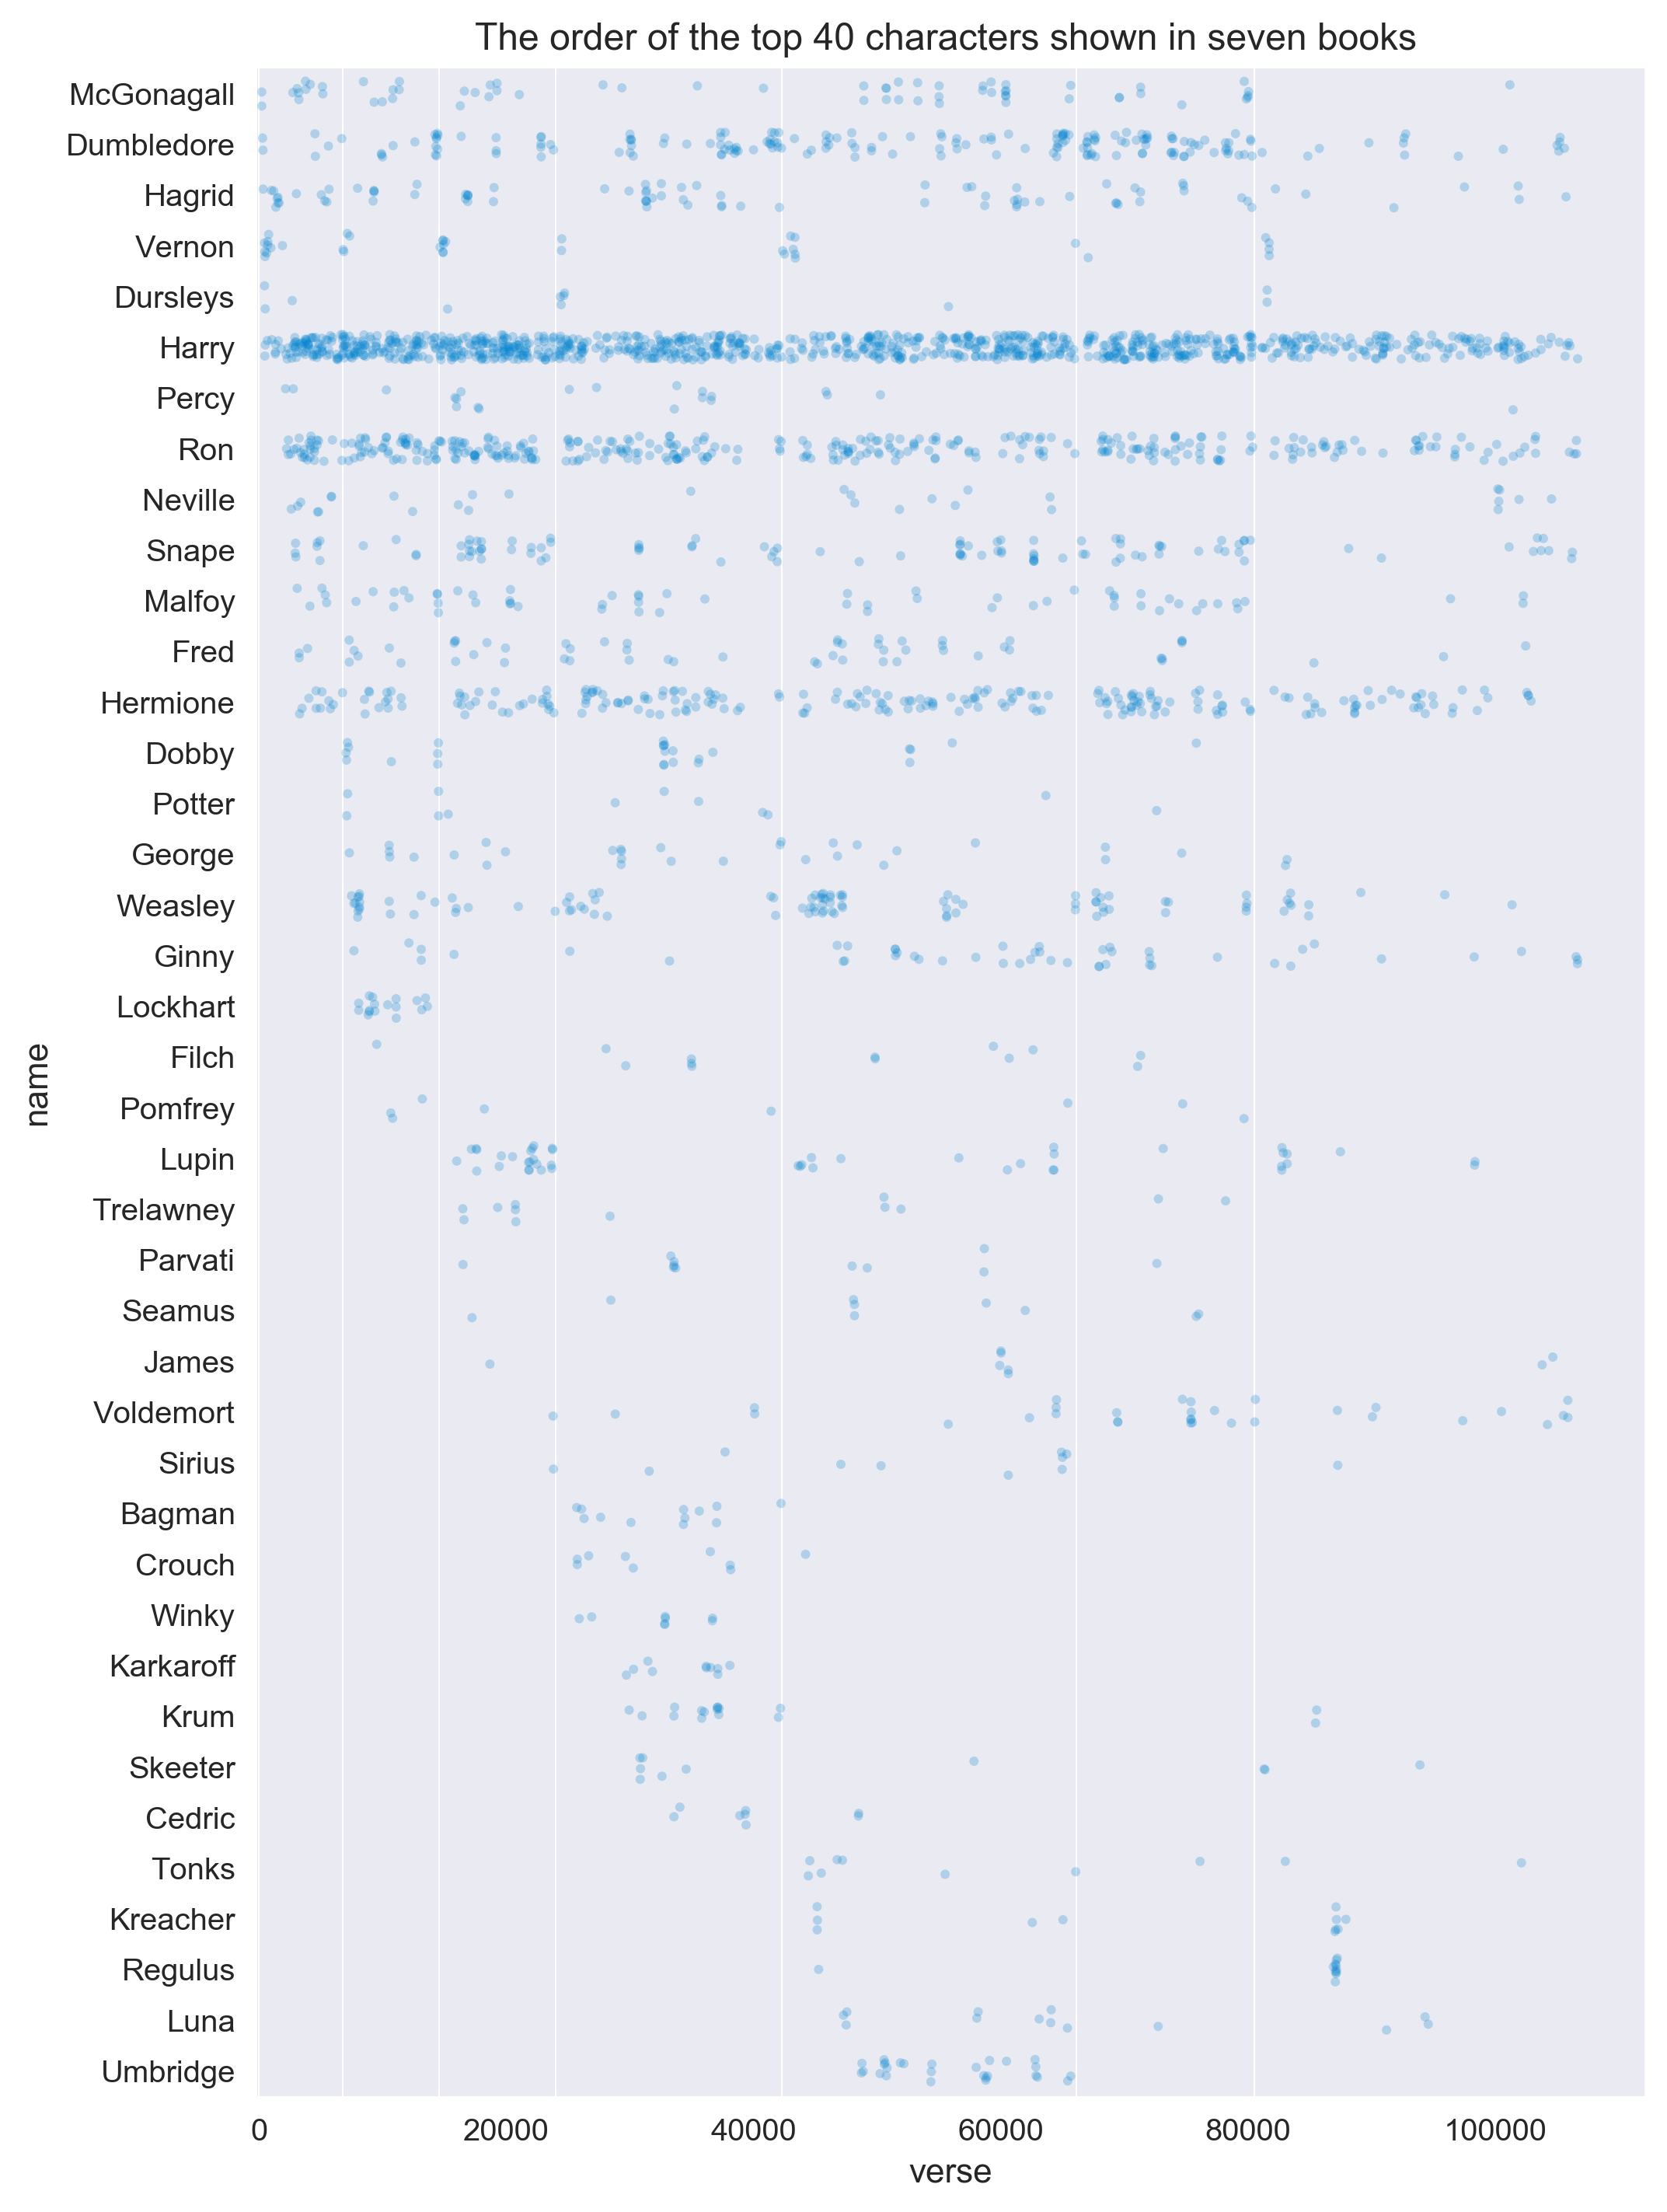

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context='notebook', style='dark')

most_frequent_actors = list(action_df['name'].value_counts().index[:40])
top_actors_df = action_df[action_df['name'].isin(most_frequent_actors)].copy()


fig, ax = plt.subplots(figsize=(8,12), dpi=144*2)

#同一个人名（y轴）出现在不同的verse时期（x轴）
sns.stripplot(x='verse', y='name', 
              data=top_actors_df, ax=ax,
              color='xkcd:cerulean',
              size=3, alpha=0.25, jitter=0.25)

#删除下方跟左边的边框
sns.despine(bottom=True, left=True)

#画垂直线分割每本书
for book, verse_num in book_locations.items():
    ax.axvline(verse_num, alpha=1, lw=0.5, color='w')



ax.set_xlim(left=-150)

ax.set_title("The order of the top 40 characters shown in seven books ");